In [3]:
import pandas as pd
import numpy as np
from sympy.logic.algorithms.lra_theory import UnhandledInput

In [4]:
from common.libs.data_analysis.SeriesDescriber import *
from common.libs.data_analysis.SeriesDescriberWRTTarget import *
from common.libs.DataDisplayer import *

In [5]:
oil_df = pd.read_csv("inputs/transformed/oil.csv", delimiter=",")
holiday_events_df = pd.read_csv("inputs/transformed/holidays_events.csv", delimiter=",")
stores_df = pd.read_csv("inputs/transformed/stores.csv", delimiter=",").set_index("store_nbr")
transactions_df = pd.read_csv("inputs/transformed/transactions.csv", delimiter=",")
train_df = pd.read_csv("inputs/transformed/train.csv", delimiter=",").set_index("id")

### Data Analysis

In [6]:
def df_info(df):
    display_side_by_side(df.describe(), df.head())
    df.info(verbose=1, show_counts=True)

In [7]:
df_info(oil_df)

dcoilwtico 
 
 
 
 
 count 
 1704.000000 
 
 
 mean 
 67.683894 
 
 
 std 
 25.619978 
 
 
 min 
 26.190000 
 
 
 25% 
 46.414687 
 
 
 50% 
 53.088125 
 
 
 75% 
 95.553214 
 
 
 max 
 110.620000 
 
 
 
 
 
 
 date 
 dcoilwtico 
 
 
 
 
 0 
 2013-01-01 
 93.076667 
 
 
 1 
 2013-01-02 
 93.140000 
 
 
 2 
 2013-01-03 
 92.970000 
 
 
 3 
 2013-01-04 
 93.120000 
 
 
 4 
 2013-01-05 
 93.113810

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1704 non-null   object 
 1   dcoilwtico  1704 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.8+ KB


In [8]:
df_info(holiday_events_df)

Unnamed: 0 
 
 
 
 
 count 
 338.000000 
 
 
 mean 
 172.026627 
 
 
 std 
 100.231494 
 
 
 min 
 0.000000 
 
 
 25% 
 86.250000 
 
 
 50% 
 171.500000 
 
 
 75% 
 256.500000 
 
 
 max 
 349.000000 
 
 
 
 
 
 
 Unnamed: 0 
 date 
 type 
 locale 
 locale_name 
 
 
 
 
 0 
 0 
 2012-03-02 
 Holiday 
 Local 
 Manta 
 
 
 1 
 1 
 2012-04-01 
 Holiday 
 Regional 
 Cotopaxi 
 
 
 2 
 2 
 2012-04-12 
 Holiday 
 Local 
 Cuenca 
 
 
 3 
 3 
 2012-04-14 
 Holiday 
 Local 
 Libertad 
 
 
 4 
 4 
 2012-04-21 
 Holiday 
 Local 
 Riobamba

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   338 non-null    int64 
 1   date         338 non-null    object
 2   type         338 non-null    object
 3   locale       338 non-null    object
 4   locale_name  338 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.3+ KB


In [9]:
describe_categorical_series(holiday_events_df["type"])

,type
count,338
unique,5
top,Holiday
freq,221
,count
type,
Holiday,221
Event,56
Additional,51
Bridge,5


In [10]:
locale_name = "Ecuador"
display_side_by_side(
        stores_df[stores_df["city"] == locale_name].head(),
        stores_df[stores_df["state"] == locale_name].head(),
)

# Regional : state

,city,state,type,cluster
store_nbr,,,,
,city,state,type,cluster
store_nbr,,,,


In [11]:
holiday_events_df[holiday_events_df["locale"] == "National"].head()

,Unnamed: 0,date,type,locale,locale_name
14,14,2012-08-10,Holiday,National,Ecuador
19,19,2012-10-09,Holiday,National,Ecuador
20,21,2012-11-02,Holiday,National,Ecuador
21,22,2012-11-03,Holiday,National,Ecuador
30,31,2012-12-21,Additional,National,Ecuador


In [12]:
df_info(holiday_events_df)

Unnamed: 0 
 
 
 
 
 count 
 338.000000 
 
 
 mean 
 172.026627 
 
 
 std 
 100.231494 
 
 
 min 
 0.000000 
 
 
 25% 
 86.250000 
 
 
 50% 
 171.500000 
 
 
 75% 
 256.500000 
 
 
 max 
 349.000000 
 
 
 
 
 
 
 Unnamed: 0 
 date 
 type 
 locale 
 locale_name 
 
 
 
 
 0 
 0 
 2012-03-02 
 Holiday 
 Local 
 Manta 
 
 
 1 
 1 
 2012-04-01 
 Holiday 
 Regional 
 Cotopaxi 
 
 
 2 
 2 
 2012-04-12 
 Holiday 
 Local 
 Cuenca 
 
 
 3 
 3 
 2012-04-14 
 Holiday 
 Local 
 Libertad 
 
 
 4 
 4 
 2012-04-21 
 Holiday 
 Local 
 Riobamba

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   338 non-null    int64 
 1   date         338 non-null    object
 2   type         338 non-null    object
 3   locale       338 non-null    object
 4   locale_name  338 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.3+ KB


In [13]:
df_info(stores_df)

cluster 
 
 
 
 
 count 
 54.000000 
 
 
 mean 
 8.481481 
 
 
 std 
 4.693395 
 
 
 min 
 1.000000 
 
 
 25% 
 4.000000 
 
 
 50% 
 8.500000 
 
 
 75% 
 13.000000 
 
 
 max 
 17.000000 
 
 
 
 
 
 
 city 
 state 
 type 
 cluster 
 
 
 store_nbr 
 
 
 
 
 
 
 
 
 1 
 Quito 
 Pichincha 
 D 
 13 
 
 
 2 
 Quito 
 Pichincha 
 D 
 13 
 
 
 3 
 Quito 
 Pichincha 
 D 
 8 
 
 
 4 
 Quito 
 Pichincha 
 D 
 9 
 
 
 5 
 Santo Domingo 
 Santo Domingo de los Tsachilas 
 D 
 4

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 1 to 54
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city     54 non-null     object
 1   state    54 non-null     object
 2   type     54 non-null     object
 3   cluster  54 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.1+ KB


In [14]:
describe_categorical_series(stores_df["type"])

,type
count,54
unique,5
top,D
freq,18
,count
type,
D,18
C,15
A,9
B,8


In [18]:
df_info(transactions_df)

store_nbr 
 transactions 
 
 
 
 
 count 
 83488.000000 
 83488.000000 
 
 
 mean 
 26.939237 
 1694.602158 
 
 
 std 
 15.608204 
 963.286644 
 
 
 min 
 1.000000 
 5.000000 
 
 
 25% 
 13.000000 
 1046.000000 
 
 
 50% 
 27.000000 
 1393.000000 
 
 
 75% 
 40.000000 
 2079.000000 
 
 
 max 
 54.000000 
 8359.000000 
 
 
 
 
 
 
 date 
 store_nbr 
 transactions 
 
 
 
 
 0 
 2013-01-01 
 25 
 770 
 
 
 1 
 2013-01-02 
 1 
 2111 
 
 
 2 
 2013-01-02 
 2 
 2358 
 
 
 3 
 2013-01-02 
 3 
 3487 
 
 
 4 
 2013-01-02 
 4 
 1922

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [19]:
df_info(train_df)

store_nbr 
 sales 
 onpromotion 
 
 
 
 
 count 
 3.000888e+06 
 3.000888e+06 
 3.000888e+06 
 
 
 mean 
 2.750000e+01 
 3.577757e+02 
 2.602770e+00 
 
 
 std 
 1.558579e+01 
 1.101998e+03 
 1.221888e+01 
 
 
 min 
 1.000000e+00 
 0.000000e+00 
 0.000000e+00 
 
 
 25% 
 1.400000e+01 
 0.000000e+00 
 0.000000e+00 
 
 
 50% 
 2.750000e+01 
 1.100000e+01 
 0.000000e+00 
 
 
 75% 
 4.100000e+01 
 1.958473e+02 
 0.000000e+00 
 
 
 max 
 5.400000e+01 
 1.247170e+05 
 7.410000e+02 
 
 
 
 
 
 
 date 
 store_nbr 
 family 
 sales 
 onpromotion 
 
 
 id 
 
 
 
 
 
 
 
 
 
 0 
 2013-01-01 
 1 
 AUTOMOTIVE 
 0.0 
 0 
 
 
 1 
 2013-01-01 
 1 
 BABY CARE 
 0.0 
 0 
 
 
 2 
 2013-01-01 
 1 
 BEAUTY 
 0.0 
 0 
 
 
 3 
 2013-01-01 
 1 
 BEVERAGES 
 0.0 
 0 
 
 
 4 
 2013-01-01 
 1 
 BOOKS 
 0.0 
 0

<class 'pandas.core.frame.DataFrame'>
Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   date         3000888 non-null  object 
 1   store_nbr    3000888 non-null  int64  
 2   family       3000888 non-null  object 
 3   sales        3000888 non-null  float64
 4   onpromotion  3000888 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 137.4+ MB


In [20]:
describe_categorical_series(train_df["store_nbr"])

,store_nbr
count,3000888
unique,54
top,1
freq,55572
,count
store_nbr,
1,55572
10,55572
11,55572
12,55572


### More Data Analysis


#### Trying to make transactions useful (unsuccessfully)


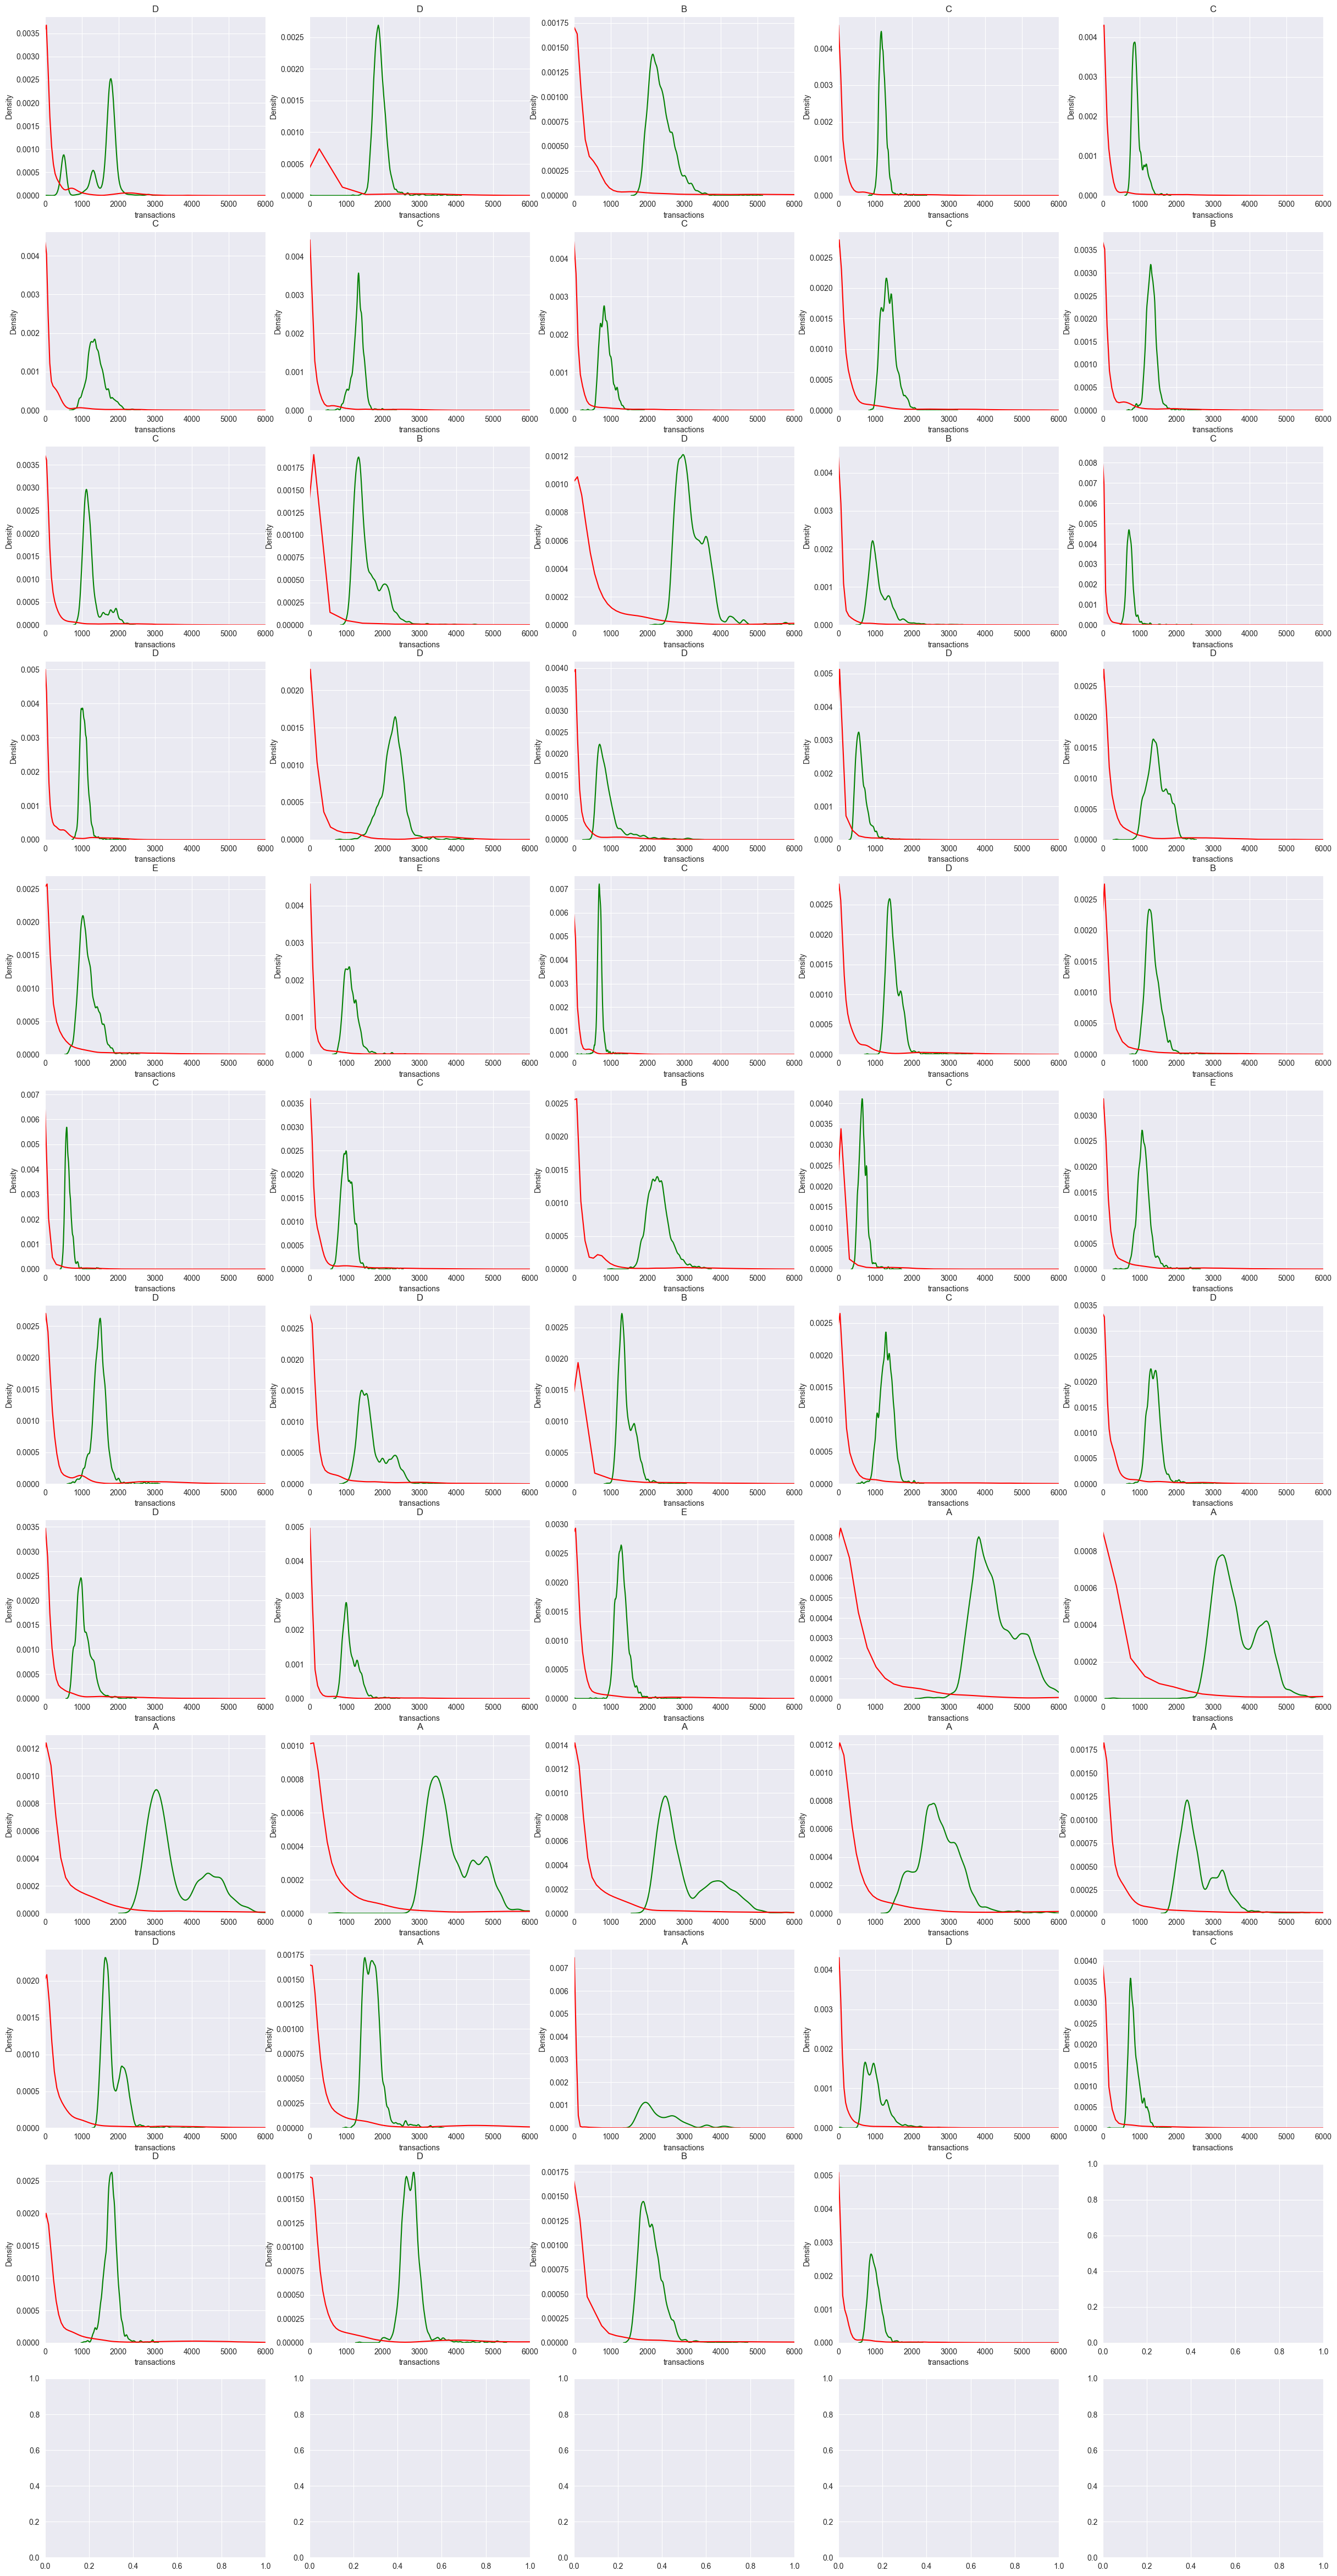

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

NUMBER_OF_FILES = 54
DIMS = (11, 5)

fig, ax = plt.subplots(nrows=DIMS[0], ncols=DIMS[1], figsize=(30, 60))

for i, file in enumerate(os.listdir("inputs/model_ready/train")):
    tmp_df = pd.read_csv(os.path.join("inputs/model_ready/train", file))

    cur_ax = ax[i // DIMS[1]][i % DIMS[1]]

    sns.kdeplot(tmp_df["transactions"], color="green", ax=cur_ax)
    sns.kdeplot(tmp_df["sales"], color="red", ax=cur_ax)

    cur_ax.set_title(tmp_df["type"][0])
    cur_ax.set_xlim(0, 6000)


20, B: 46.02137767220903
21, B: 55.58194774346793
22, C: 60.154394299287404
29, E: 48.09976247030879
42, D: 57.24465558194775
52, A: 92.99287410926365
53, D: 30.700712589073635


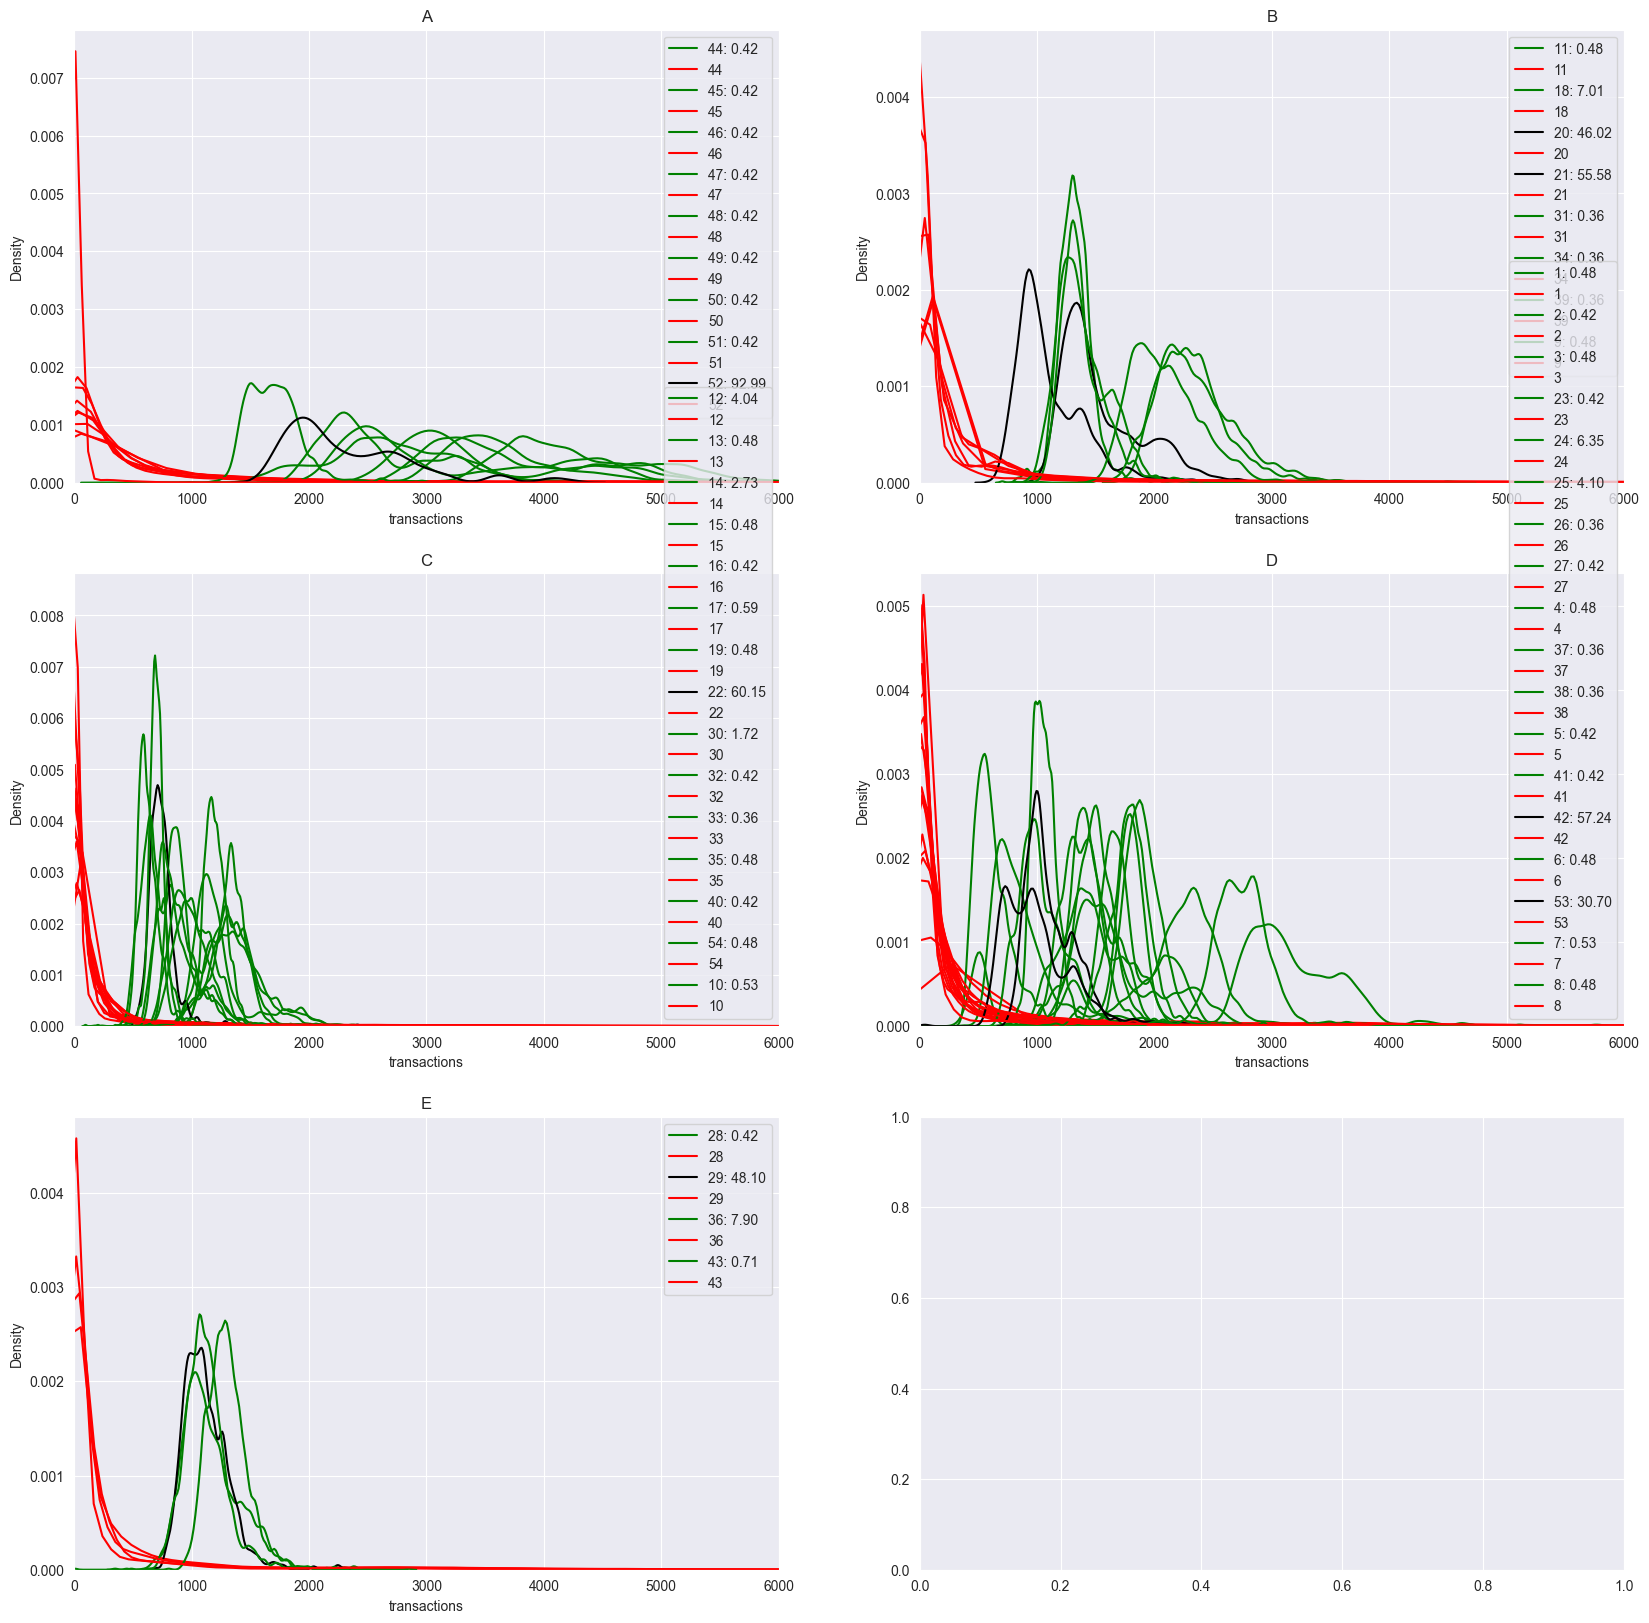

In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

NUMB_OF_CATEGORIES = 54
DIMS = (3, 2)

fig, ax = plt.subplots(nrows=DIMS[0], ncols=DIMS[1], figsize=(20, 20))

for _, file in enumerate(os.listdir("inputs/model_ready/train")):
    tmp_df = pd.read_csv(os.path.join("inputs/model_ready/train", file))

    i = ord(tmp_df["type"][0][0]) - ord('A')

    cur_ax = ax[i // DIMS[1]][i % DIMS[1]]

    n_nulls = tmp_df["transactions"].isnull().sum() / len(tmp_df) * 100
    color = "green"
    if n_nulls > 30:
        print(f"{tmp_df["store_nbr"][0]}, {tmp_df['type'][0]}: {n_nulls}")
        color = "black"

    sns.kdeplot(tmp_df["transactions"], color=color, ax=cur_ax, label=f"{tmp_df["store_nbr"][0]}: {n_nulls:.2f}")
    sns.kdeplot(tmp_df["sales"], color="red", ax=cur_ax, label=tmp_df["store_nbr"][0])

    cur_ax.set_title(tmp_df["type"][0])
    cur_ax.set_xlim(0, 6000)

    cur_ax.legend()